In [1]:
import pandas as pd
import pickle
import csv
from tqdm import tqdm_notebook
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
with open(r'C:\Users\savintseva\_University\parsing\LDA\test\ldamodel_topics_15.pickle', 'rb') as f:
    topics_15 = pickle.load(f)
    
with open(r'C:\Users\savintseva\_University\parsing\sentim_dict.txt', encoding='utf-8') as f:
      sentidict = dict(x.rstrip().split(None, 1) for x in f)

In [22]:
# LATINA AMERICA
with open(r'C:\Users\savintseva\_University\parsing\LATINA_LDA\ldamodel_topics_15.pickle', 'rb') as f:
    topics_15 = pickle.load(f)
    
with open(r'C:\Users\savintseva\_University\parsing\youtube comments\espanol_dict.txt', encoding='utf-8') as f:
      sentidict = dict(x.rstrip().split(None, 1) for x in f)

In [23]:
# AMERICA
with open(r'C:\Users\savintseva\_University\parsing\USA_LDA\ldamodel_topics_15.pickle', 'rb') as f:
    topics_15 = pickle.load(f)
    
with open(r'C:\Users\savintseva\_University\parsing\youtube comments\usa\english_liu_dict.txt', encoding='utf-8') as f:
    sentidict = dict(x.rstrip().split(None, 1) for x in f)

In [3]:
topics_15

[(0,
  [('писать', 0.057100132),
   ('вопрос', 0.039911855),
   ('иметь', 0.037980903),
   ('русский', 0.035350557),
   ('правильно', 0.024229769),
   ('решить', 0.022743056),
   ('россиянин', 0.01780708),
   ('человек', 0.015912909),
   ('лично', 0.015583159),
   ('смысл', 0.0153518235),
   ('умный', 0.013535937),
   ('отношение', 0.013462842),
   ('общество', 0.012903866),
   ('суд', 0.012865734),
   ('норма', 0.012828906),
   ('ехать', 0.012216566),
   ('половина', 0.011976734),
   ('слышать', 0.011955284),
   ('крым', 0.01194507),
   ('экономика', 0.01160007),
   ('мочь', 0.011135354),
   ('американец', 0.010887368),
   ('система', 0.010842749),
   ('бабушка', 0.010148196),
   ('продать', 0.009818512),
   ('ум', 0.009772384),
   ('х', 0.009719695),
   ('быдло', 0.009592025),
   ('жопа', 0.0095593035),
   ('дело', 0.009453348),
   ('улица', 0.008827378),
   ('хохол', 0.008779045),
   ('приехать', 0.0082848),
   ('реальный', 0.007852086),
   ('называться', 0.007846087),
   ('устраива

In [4]:
top_words_per_topic = []

for t in topics_15:
    top_words_per_topic.extend((t[0], ) + x for x in t[1])
    
pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words_15.csv")

words = pd.read_csv("top_words_15.csv", encoding='utf-8')
del words['Unnamed: 0']

words['sentim'] = 0
words.head()

Topic       Word         P  sentim
0      0     писать  0.057100       0
1      0     вопрос  0.039912       0
2      0      иметь  0.037981       0
3      0    русский  0.035351       0
4      0  правильно  0.024230       0

In [5]:
# Интерпретация получившихся тем

themes_15 = {
    0: 'общественные вопросы',
    1: 'ситуация в стране',
    2: 'бытовые проблемы',
    3: 'споры',
    4: 'нужды человека',
    5: 'путин и страна',
    6: 'работа',
    7: 'карантин',
    8: 'финансовые проблемы',
    9: 'семья',
    10: 'жизнь в россии',
    11: 'коронавирус в мире',
    12: 'удаленные или спам',
    13: 'повседневная жизнь',
    14: 'образование'
}

In [5]:
# Интерпретация получившихся тем LATINA AMERICA
themes_15 = {
    0: 'демократия',
    1: 'венесуэла и россия',
    2: 'революционные настроения',
    3: 'правительство',
    4: 'воровство и терроризм',
    5: 'президент',
    6: 'проблемы людей',
    7: 'освобождение',
    8: 'ложь и предательство',
    9: 'ожидания',
    10: 'ситуация в мире',
    11: 'базовые нужды',
    12: 'сша и латинская америка',
    13: 'коммунисты и диктатура',
    14: 'трамп'
}

In [26]:
# Интерпретация получившихся тем AMERICA
themes_15 = {
	0: 'общественное мнение',
	1: 'ложь и страх',
	2: 'здравоохранение',
	3: 'коронавирус',
	4: 'бог',
	5: 'трамп и ситуация в стране',
	6: 'человеческие чувства',
	7: 'расизм',
	8: 'законопорядок',
	9: 'деньги и работа',
	10: 'ненависть и обман',
	11: 'повседневная жизнь',
	12: 'америка, патриотизм',
	13: 'выборы',
	14: 'криминал и коррупция'
}

In [6]:
# добавление тональной разметки и названия тем

words['sentim'] = words['Word'].map(lambda x: sentidict[x] if (x in sentidict) else 0)
words['Topic'] = words['Topic'].map(lambda x: themes_15[x] if (x in themes_15) else 0)
words['sentim'] = words['sentim'].map(lambda x: int(x))

In [7]:
words

Topic         Word         P  sentim
0     общественные вопросы       писать  0.057100       0
1     общественные вопросы       вопрос  0.039912       0
2     общественные вопросы        иметь  0.037981       0
3     общественные вопросы      русский  0.035351       0
4     общественные вопросы    правильно  0.024230       1
...                    ...          ...       ...     ...
2245           образование    накормить  0.001388       0
2246           образование        лгать  0.001380      -1
2247           образование     согласие  0.001366       0
2248           образование  новосибирск  0.001347       0
2249           образование        марат  0.001342       0

[2250 rows x 4 columns]

In [8]:
print('Общая тональность: ', sum(words['sentim']))
print('Средняя тональность:', words['sentim'].mean())

Общая тональность:  -262
Средняя тональность: -0.11644444444444445


In [9]:
# Количество тональных компонентов
words['sentim'].value_counts()

 0    1682
-1     403
 1     157
-2       8
Name: sentim, dtype: int64

In [10]:
# Средняя тональность для каждой темы
words[["Topic", "sentim"]].groupby("Topic").mean().sort_values('sentim')

sentim
Topic                         
бытовые проблемы     -0.220000
жизнь в россии       -0.180000
ситуация в стране    -0.166667
работа               -0.153333
повседневная жизнь   -0.140000
общественные вопросы -0.133333
образование          -0.106667
нужды человека       -0.100000
коронавирус в мире   -0.093333
споры                -0.093333
удаленные или спам   -0.093333
семья                -0.080000
путин и страна       -0.066667
финансовые проблемы  -0.066667
карантин             -0.053333

In [11]:
avg = words[["Topic", "sentim"]].groupby("Topic").mean().sort_values('sentim', ascending=False)
avg = avg.reset_index()

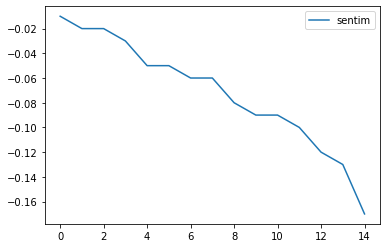

In [12]:
avg["Topic"] = avg["Topic"].map(lambda x: str(x))
avg.plot()

In [11]:
# Присутствие тональных компонентов в темах

words[["Topic", "sentim"]].groupby("Topic").agg(lambda x: x.ne(0).sum()).sort_values('sentim', ascending=False)

sentim
Topic                       
повседневная жизнь        51
бытовые проблемы          47
жизнь в россии            47
общественные вопросы      45
работа                    41
ситуация в стране         38
нужды человека            36
споры                     36
семья                     35
финансовые проблемы       35
образование               34
карантин                  32
путин и страна            31
удаленные или спам        31
коронавирус в мире        29

In [12]:
df = words[["Topic", "sentim"]].groupby("Topic").agg(lambda x: x.lt(-1).sum()).sort_values('sentim', ascending=False)

In [13]:
# Количество положительных тональных компонентов в каждой теме

words[["Topic", "sentim"]].groupby("Topic").agg(lambda x: x.eq(1).sum()).sort_values('sentim', ascending=False)

sentim
Topic                       
повседневная жизнь        15
общественные вопросы      13
финансовые проблемы       13
карантин                  12
семья                     12
нужды человека            11
путин и страна            11
споры                     11
жизнь в россии            10
образование                9
работа                     9
удаленные или спам         9
коронавирус в мире         8
бытовые проблемы           7
ситуация в стране          7

In [14]:
# Количество отрицательных тональных компонентов в каждой теме

words[["Topic", "sentim"]].groupby("Topic").agg(lambda x: x.le(-1).sum()).sort_values('sentim', ascending=False)

sentim
Topic                       
бытовые проблемы          40
жизнь в россии            37
повседневная жизнь        36
общественные вопросы      32
работа                    32
ситуация в стране         31
нужды человека            25
образование               25
споры                     25
семья                     23
удаленные или спам        22
финансовые проблемы       22
коронавирус в мире        21
карантин                  20
путин и страна            20

In [15]:
pos = words[["Topic", "sentim"]].groupby("Topic").agg(lambda x: x.eq(1).sum()).sort_values('sentim', ascending=False)
neg = words[["Topic", "sentim"]].groupby("Topic").agg(lambda x: x.le(-1).sum()).sort_values('sentim', ascending=False)
pos = pos.rename(columns={'sentim': 'sentim_pos'})
neg = neg.rename(columns={'sentim': 'sentim_neg'})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000269251314C8>,
      dtype=object)

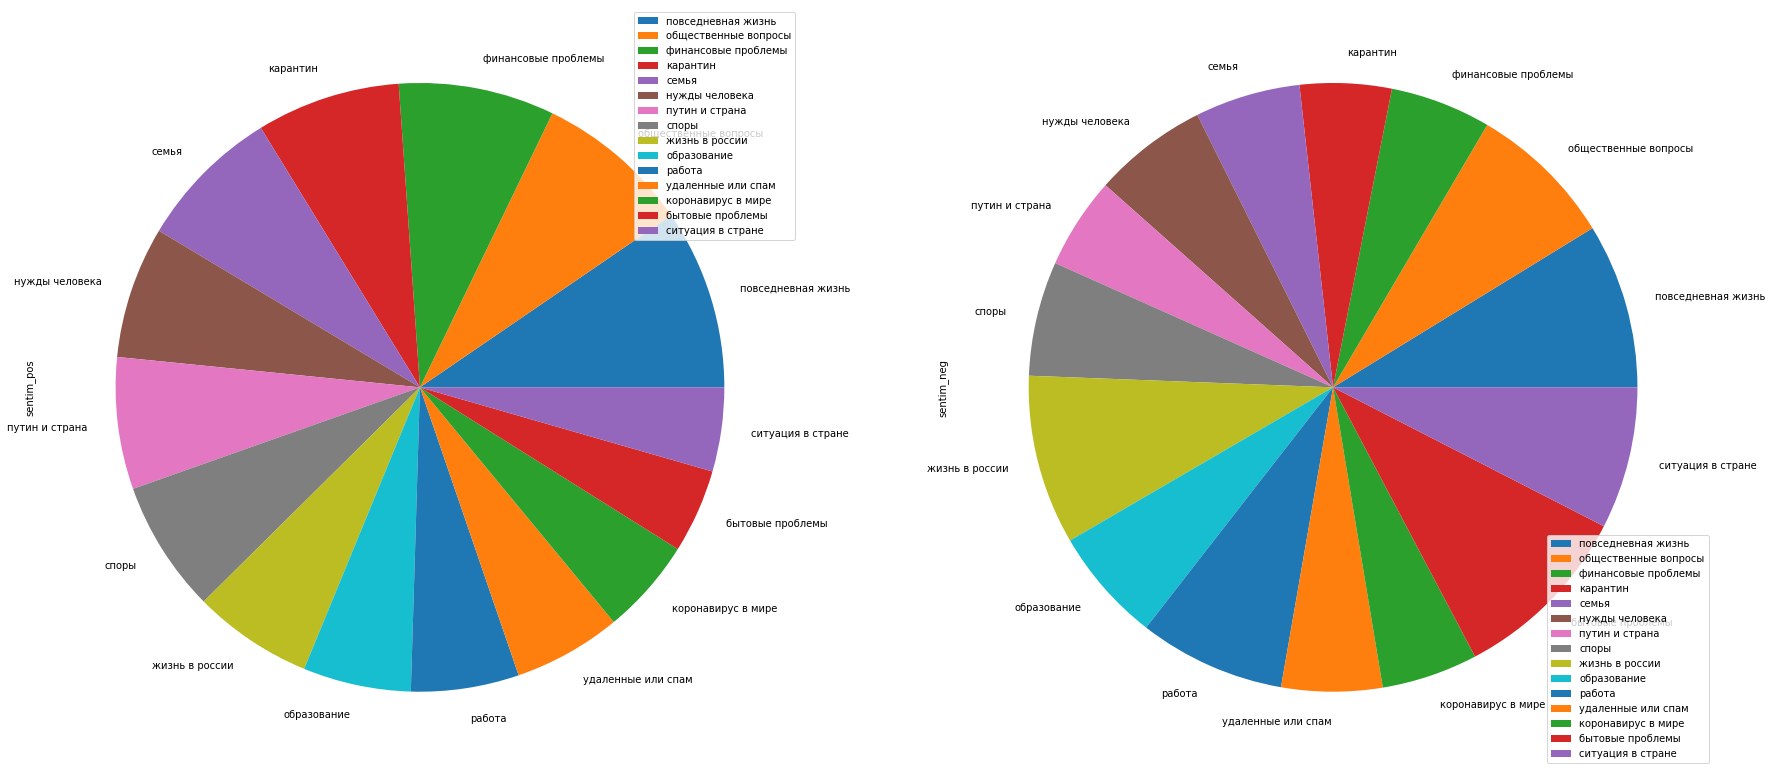

In [16]:
df = pos.join(neg, on='Topic')
df.plot.pie(subplots=True, figsize=(30, 20))

In [18]:
df = df.reset_index()
# del df['level_0']
df

index                 Topic  sentim_pos  sentim_neg
0       0    повседневная жизнь          15          36
1       1  общественные вопросы          13          32
2       2   финансовые проблемы          13          22
3       3              карантин          12          20
4       4                 семья          12          23
5       5        нужды человека          11          25
6       6        путин и страна          11          20
7       7                 споры          11          25
8       8        жизнь в россии          10          37
9       9           образование           9          25
10     10                работа           9          32
11     11    удаленные или спам           9          22
12     12    коронавирус в мире           8          21
13     13      бытовые проблемы           7          40
14     14     ситуация в стране           7          31

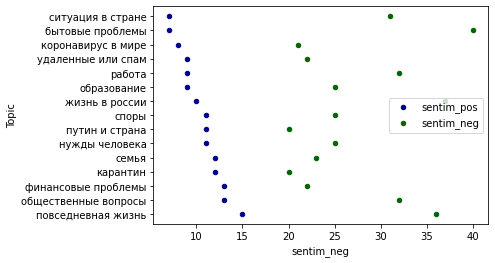

In [19]:
ax = df.plot.scatter(x='sentim_pos', y='Topic', color='DarkBlue', label='sentim_pos')
df.plot.scatter(x='sentim_neg', y='Topic', color='DarkGreen', label='sentim_neg', ax=ax)